# **EDA**


**1-) Temel Veri Analizi**

Bu a≈üamada veriyi anlamak i√ßin grafiklere ba≈ülamadan √∂nce yapacaƒüƒ±mƒ±z ≈üeyler:

Veriyi y√ºklemek ve genel bilgi almak

Satƒ±r/s√ºtun sayƒ±sƒ±

S√ºtun tipleri (int, float, object)

ƒ∞lk birka√ß g√∂zlem

Sayƒ±sal deƒüi≈ükenlerin √∂zet istatistiƒüi

Ortalama, medyan, min, max, standart sapma

Kategorik deƒüi≈ükenlerin benzersiz deƒüer sayƒ±sƒ±

Ka√ß farklƒ± kategori var?

Eksik deƒüer analizi

Hangi s√ºtunda eksik var?

Eksik y√ºzdesi ne kadar?

Aykƒ±rƒ± deƒüerlerin temel kontrol√º (sayƒ±sal veriler i√ßin)

≈ûimdilik sayƒ±sal √∂zet ile hangi deƒüi≈ükenlerde u√ß deƒüer olabileceƒüine bakƒ±yoruz

Boxplot hen√ºz yok, sadece sayƒ±sal kontroller

Ama√ß: Veriyi ve potansiyel problemleri anlamak, hangi s√ºtunlarda g√∂rselle≈ütirme ve detaylƒ± inceleme yapƒ±lacaƒüƒ±na karar vermek.

In [1]:
# =====================================
#  A≈ûAMA 1: TEMEL VERƒ∞ ANALƒ∞Zƒ∞
# =====================================

import pandas as pd

# -------------------------------
# 0Ô∏è‚É£ Google Drive'ƒ± Baƒülama
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# 1Ô∏è‚É£ Dosya Yolu ve Veri Y√ºkleme
# -------------------------------
file_path = "/content/drive/MyDrive/Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

print("="*50)
print("1Ô∏è‚É£ A≈ûAMA 1 ‚Äì TEMEL VERƒ∞ ANALƒ∞Zƒ∞")
print("="*50)

# -------------------------------
# Genel Bilgi
# -------------------------------
print("\n===== Genel Bilgi =====")
print("Veri boyutu (satƒ±r, s√ºtun):", df.shape)
print("\nS√ºtun tipleri ve eksik deƒüerler:")
print(df.info())
print("\nƒ∞lk 5 g√∂zlem:")
print(df.head())

# -------------------------------
# Sayƒ±sal Deƒüi≈üken √ñzetleri
# -------------------------------
print("\n===== Sayƒ±sal Deƒüi≈üken √ñzetleri =====")
print(df.describe().T)

# -------------------------------
# Kategorik Deƒüi≈ükenlerin Benzersiz Deƒüer Sayƒ±sƒ±
# -------------------------------
print("\n===== Kategorik Deƒüi≈ükenlerin Benzersiz Deƒüer Sayƒ±sƒ± =====")
print(df.nunique())

# -------------------------------
# Eksik Deƒüer Analizi
# -------------------------------
print("\n===== Eksik Deƒüer Analizi =====")
missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({"Eksik_Sayisi": missing_count, "Eksik_Yuzdesi (%)": missing_percent})
print(missing_df)

# -------------------------------
# Aykƒ±rƒ± Deƒüer √ñn Kontrol√º
# -------------------------------
print("\n===== Aykƒ±rƒ± Deƒüer √ñn Kontrol√º =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"{col} i√ßin aykƒ±rƒ± deƒüer sayƒ±sƒ±: {outliers.shape[0]}")

print("\n‚úÖ A≈ûAMA 1 tamamlandƒ±. Artƒ±k veriyi temel olarak analiz ettik.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1Ô∏è‚É£ A≈ûAMA 1 ‚Äì TEMEL VERƒ∞ ANALƒ∞Zƒ∞

===== Genel Bilgi =====
Veri boyutu (satƒ±r, s√ºtun): (2235, 13)

S√ºtun tipleri ve eksik deƒüerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-nul

**2-) G√∂rselle≈ütirme (Detaylƒ± Analiz)**

2.a≈üamadaki grafikler isteƒüe baƒülƒ±, daha √ßok veri ke≈üfi ve modelleme √∂ncesi karar i√ßin kullanƒ±lƒ±r.

2Ô∏è‚É£ A≈ûAMA 2 ‚Äì G√ñRSEL ANALƒ∞Z (OKUNAKLI GRAFƒ∞KLER)

===== 1Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenlerin Daƒüƒ±lƒ±mlarƒ± =====


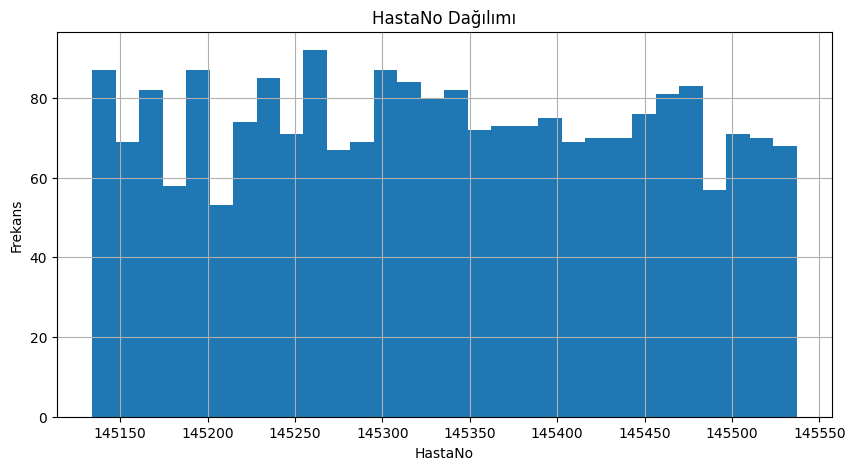

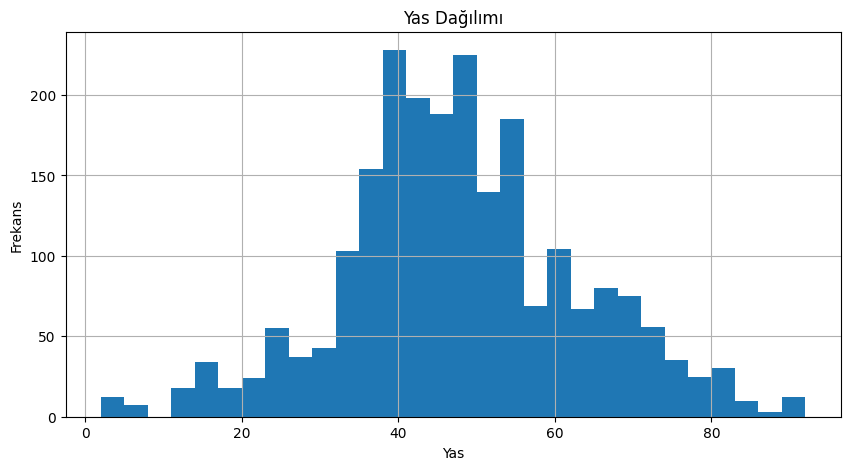


===== 2Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenlerde Boxplot =====


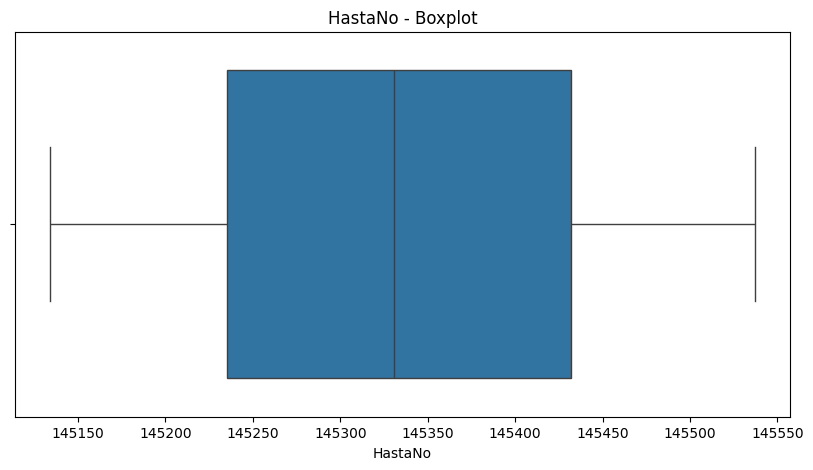

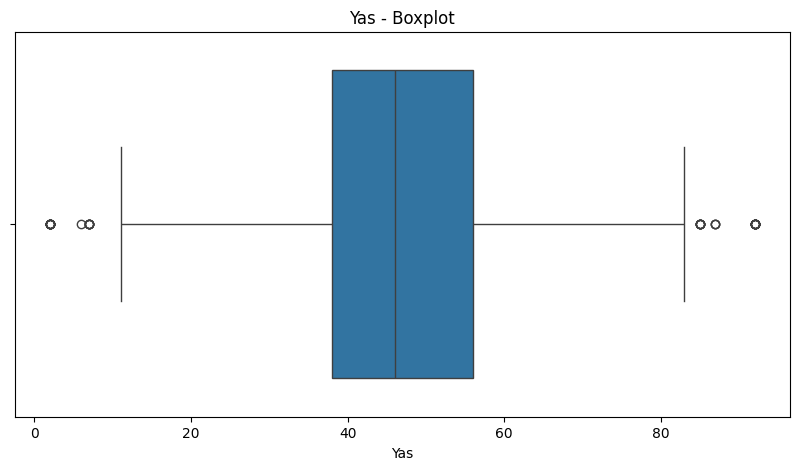


===== 3Ô∏è‚É£ Kategorik Deƒüi≈üken Daƒüƒ±lƒ±mlarƒ± =====


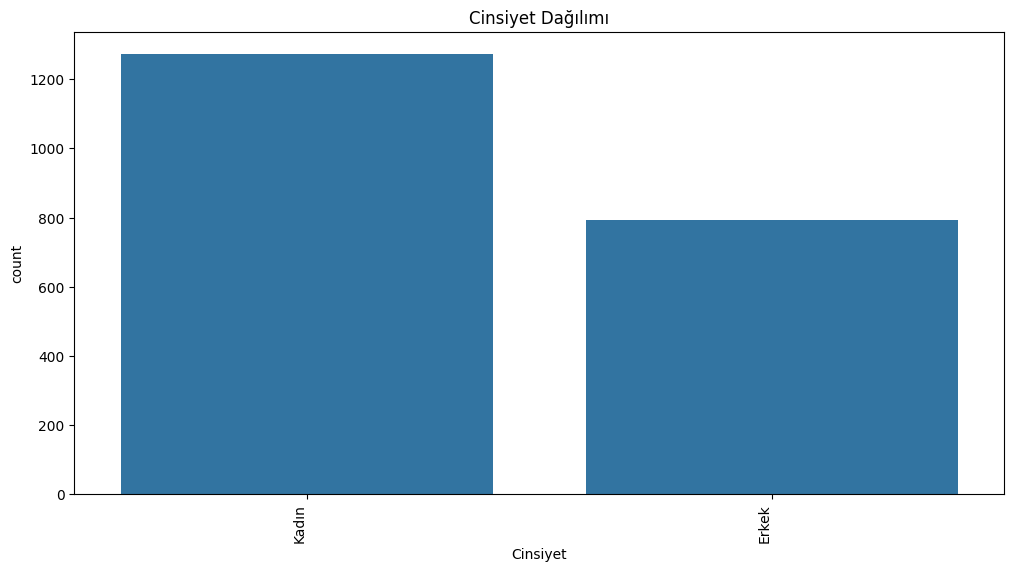

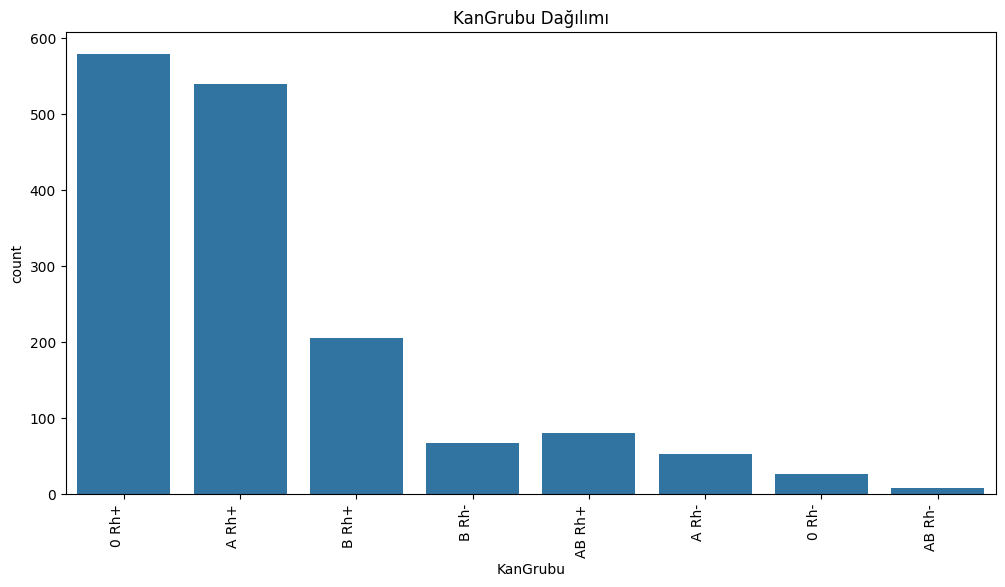

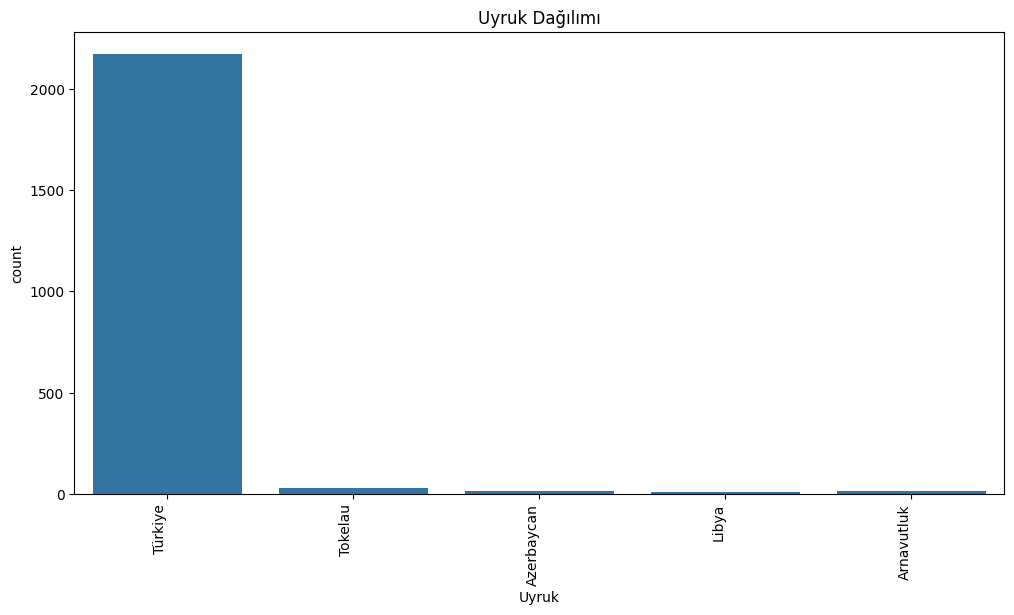

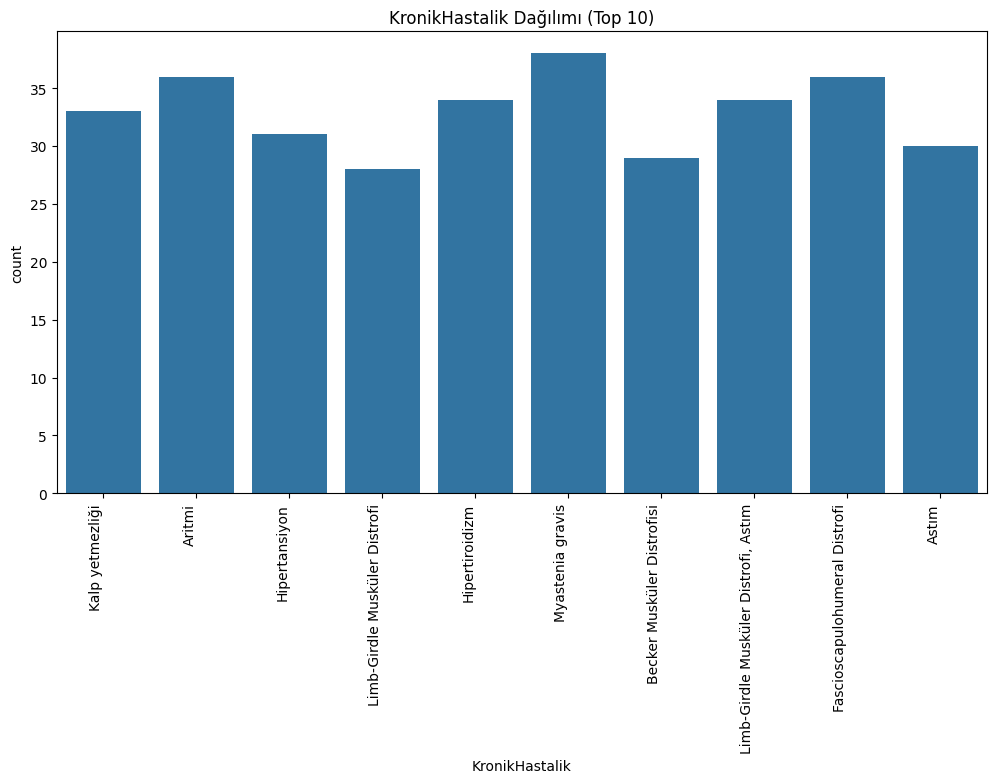

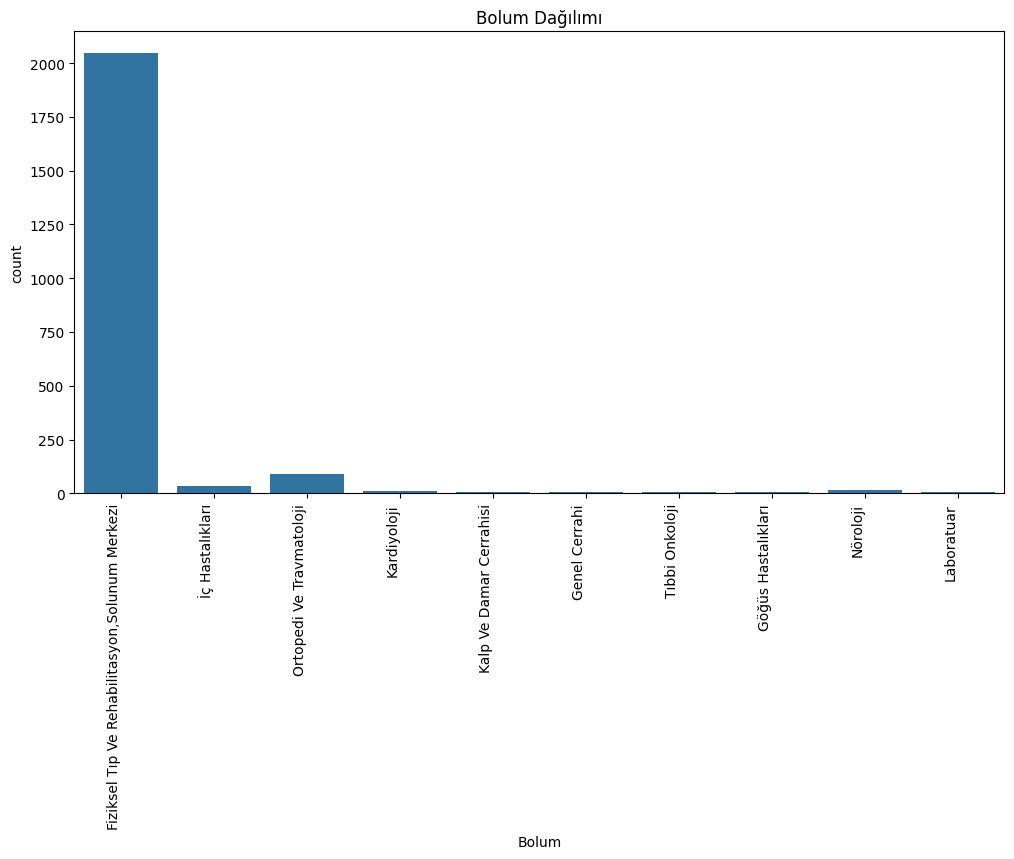

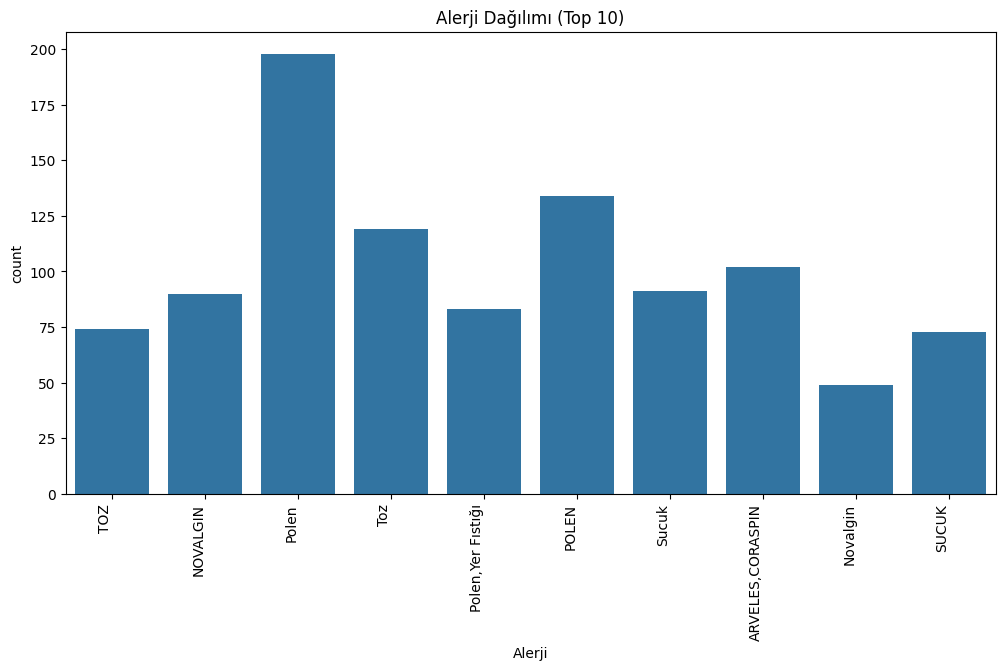

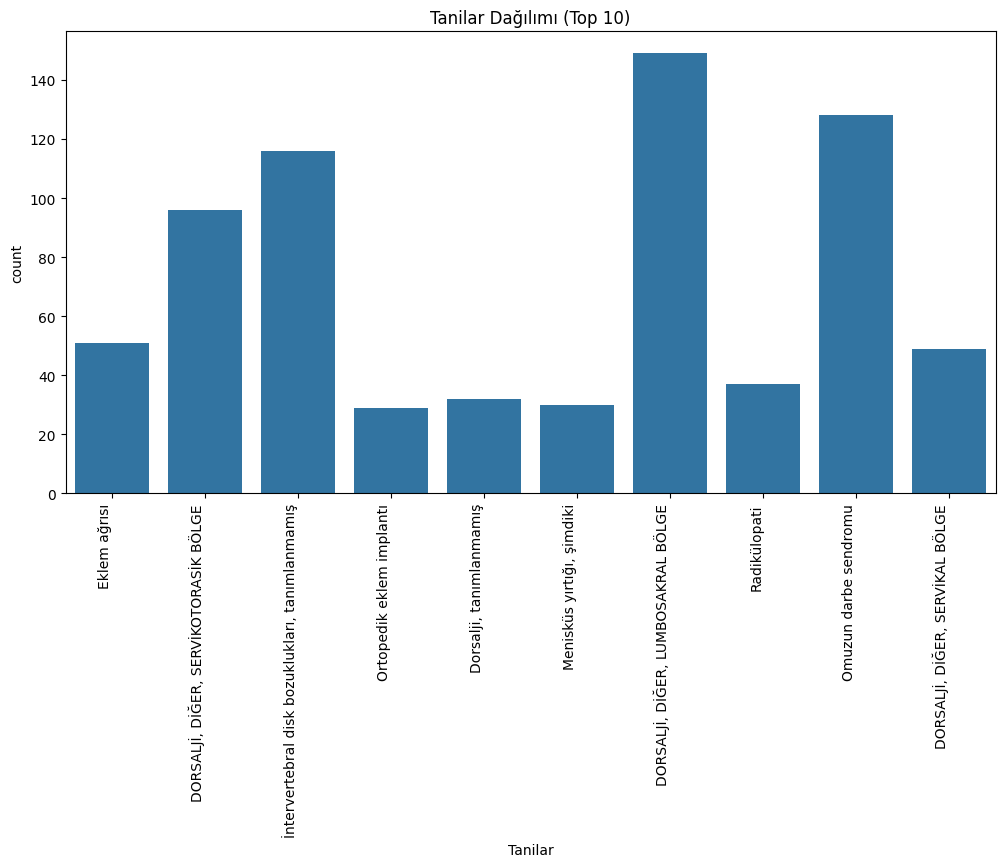

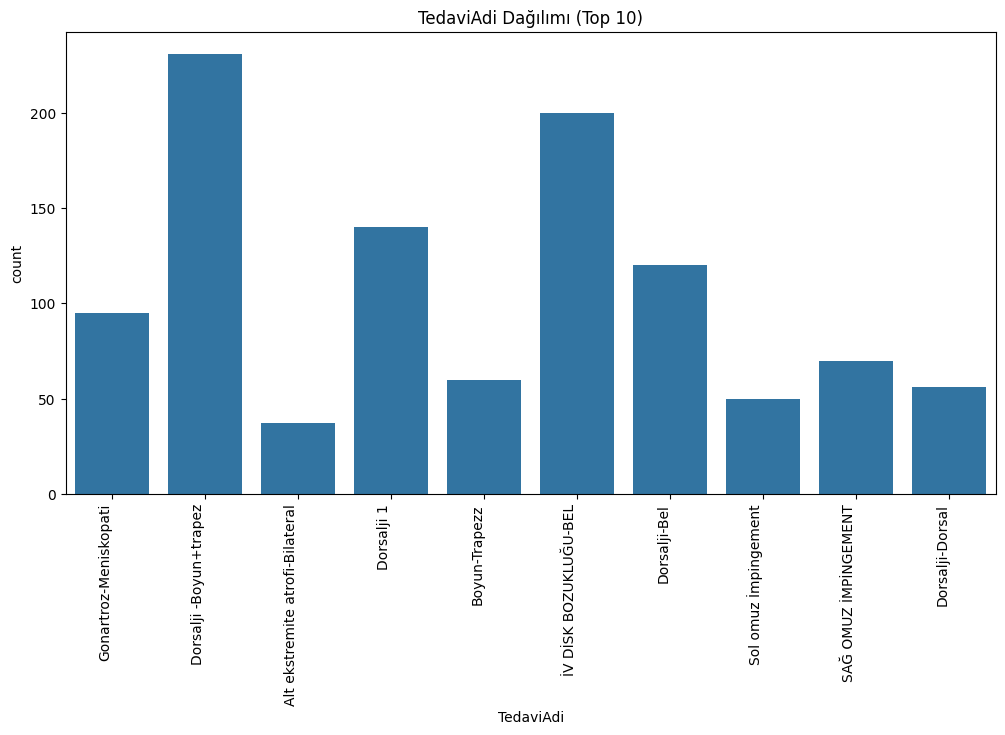

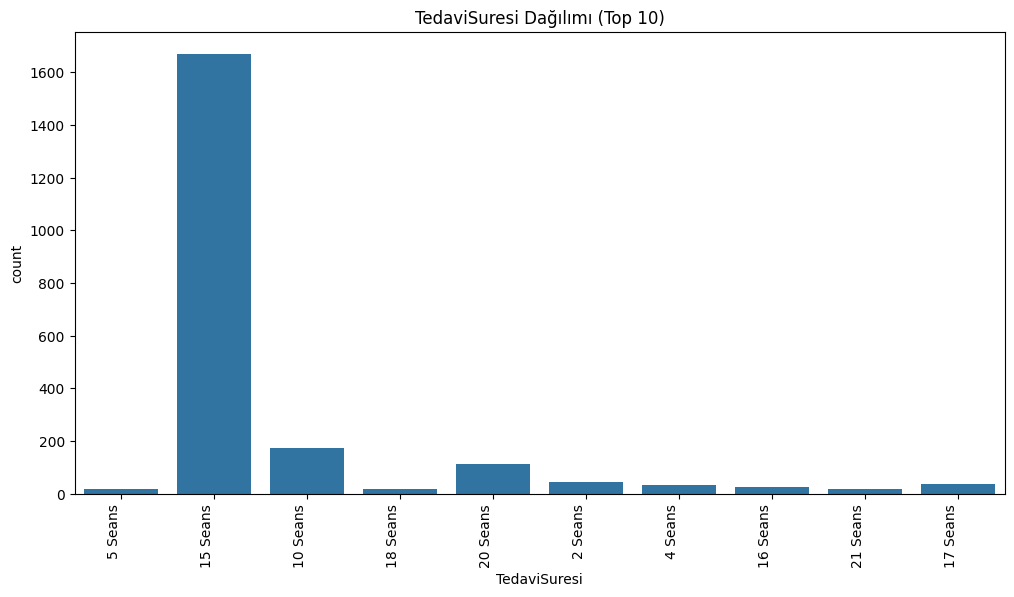

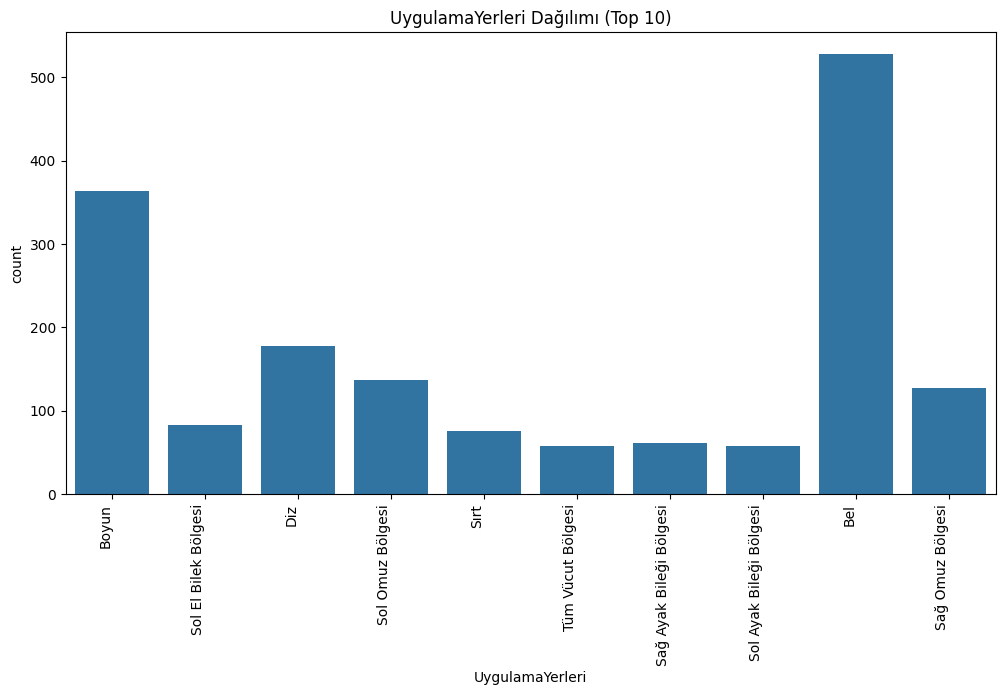

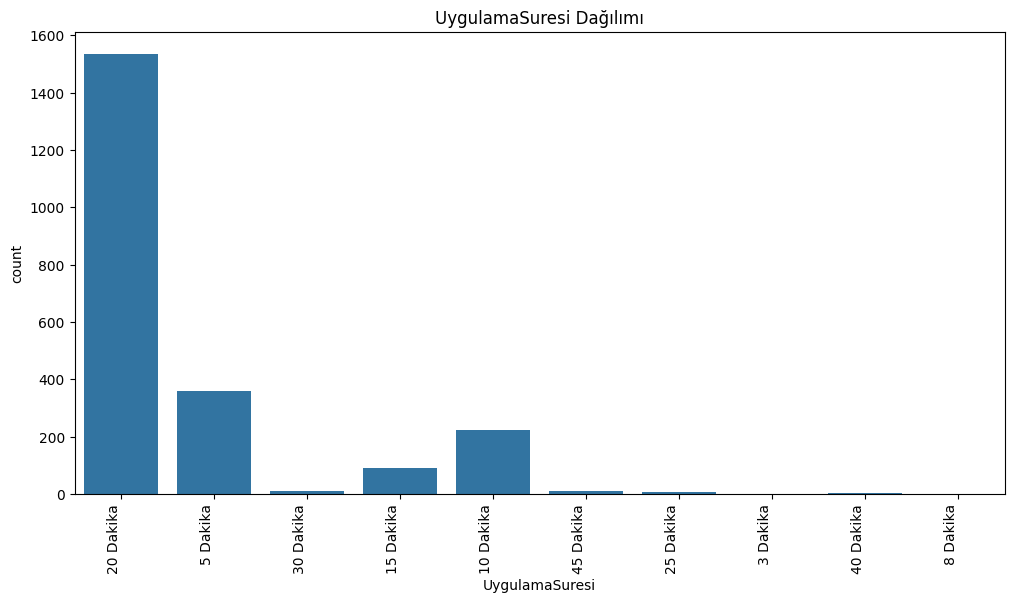


===== 4Ô∏è‚É£ Hedef Deƒüi≈üken (TedaviSuresi) ile Kategorik Deƒüi≈ükenler =====


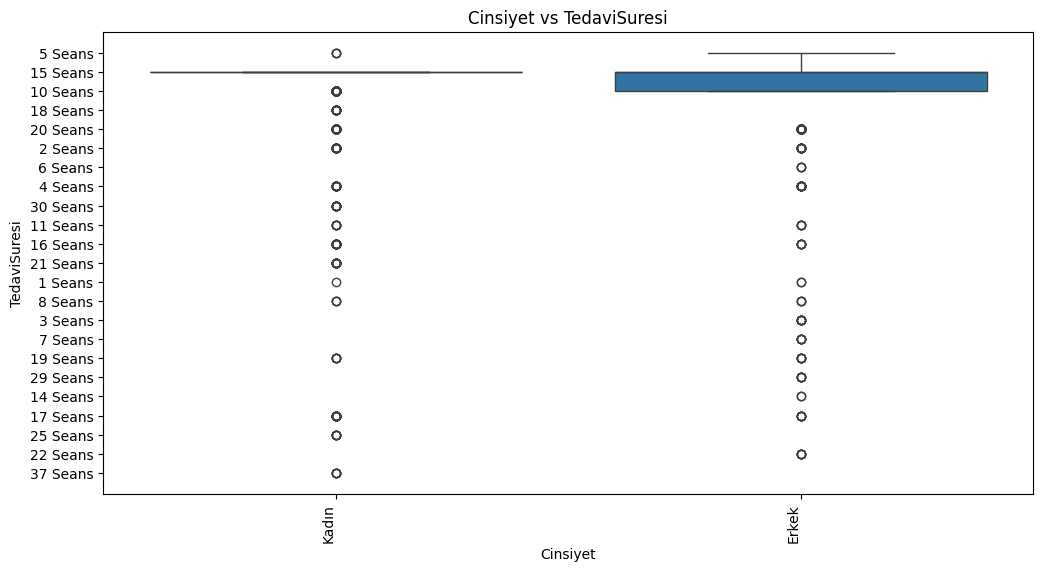

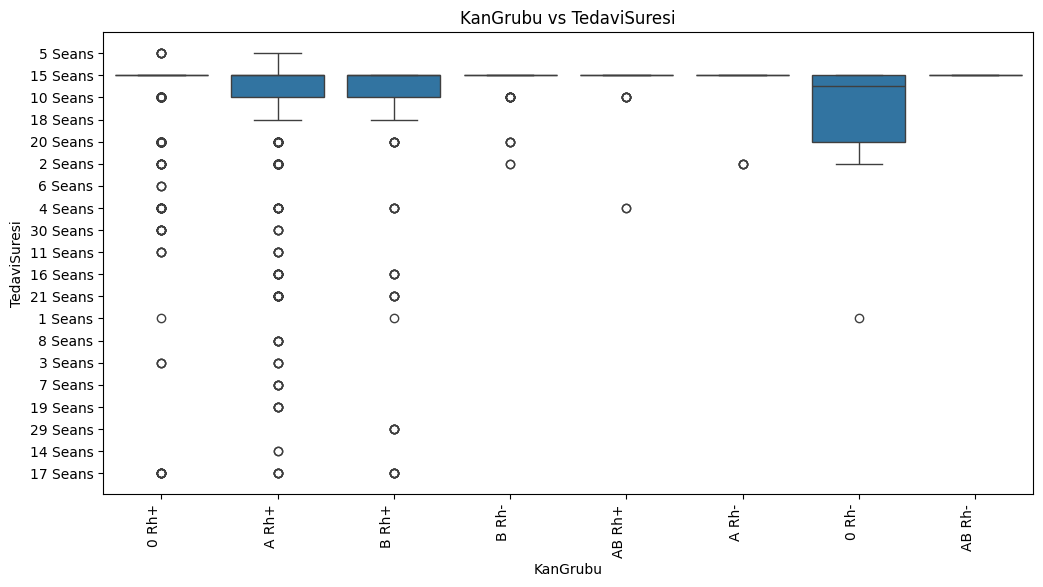

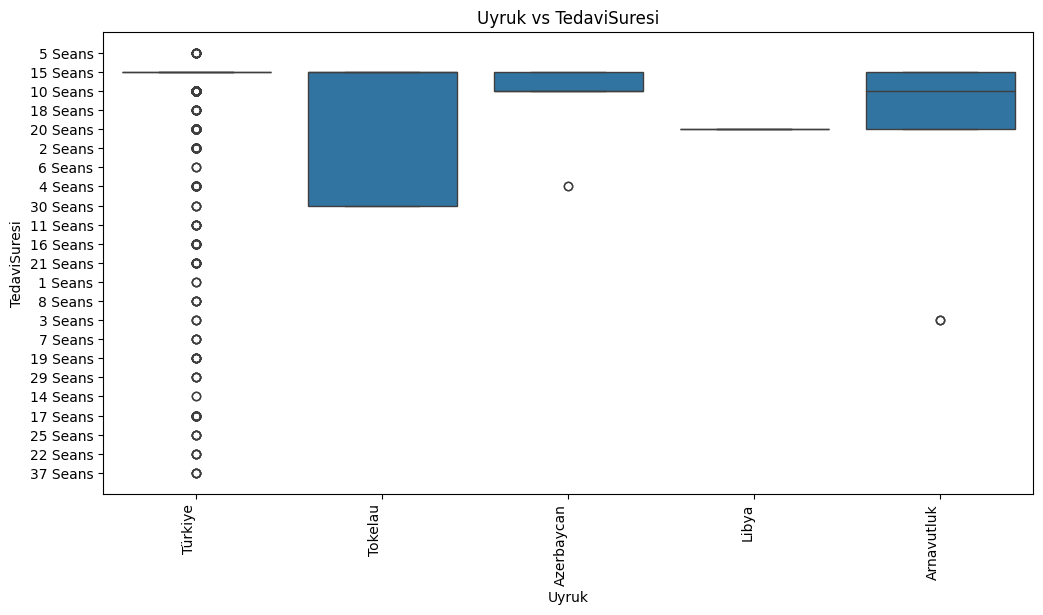

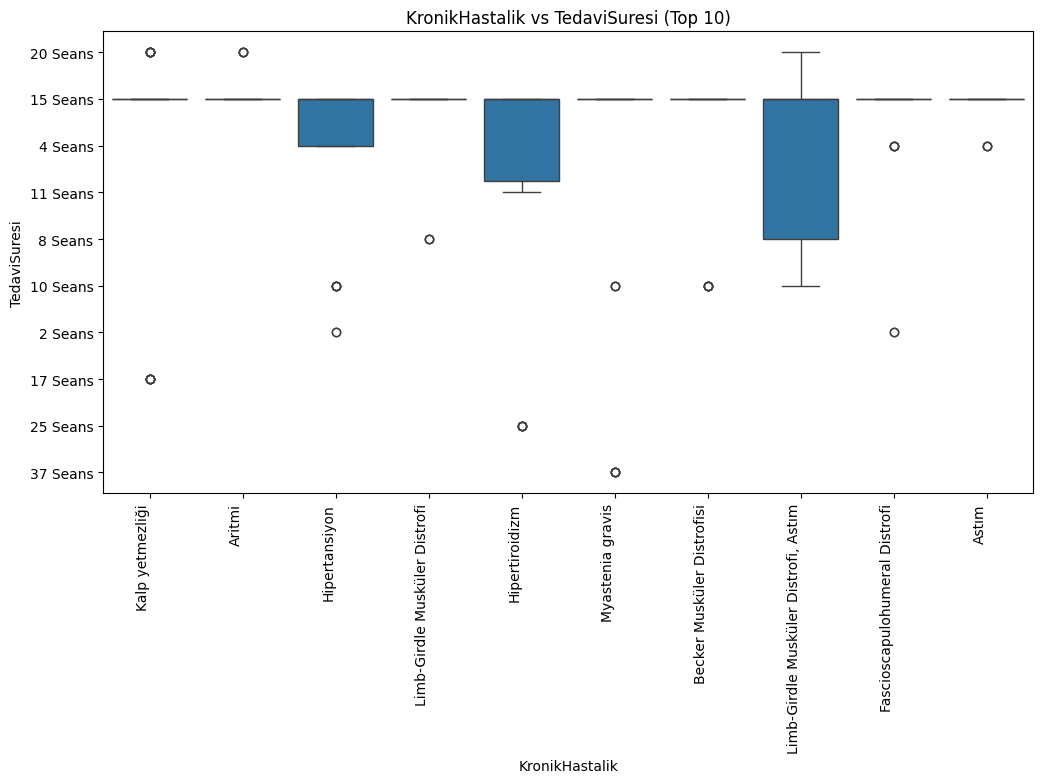

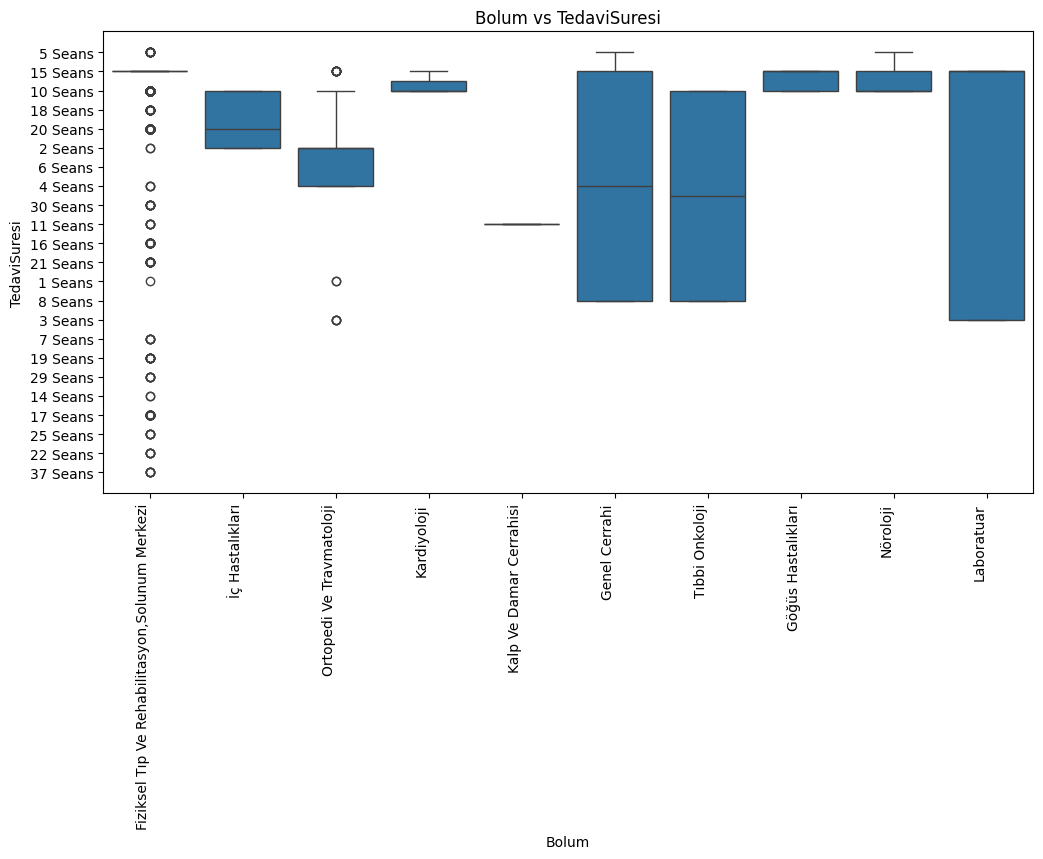

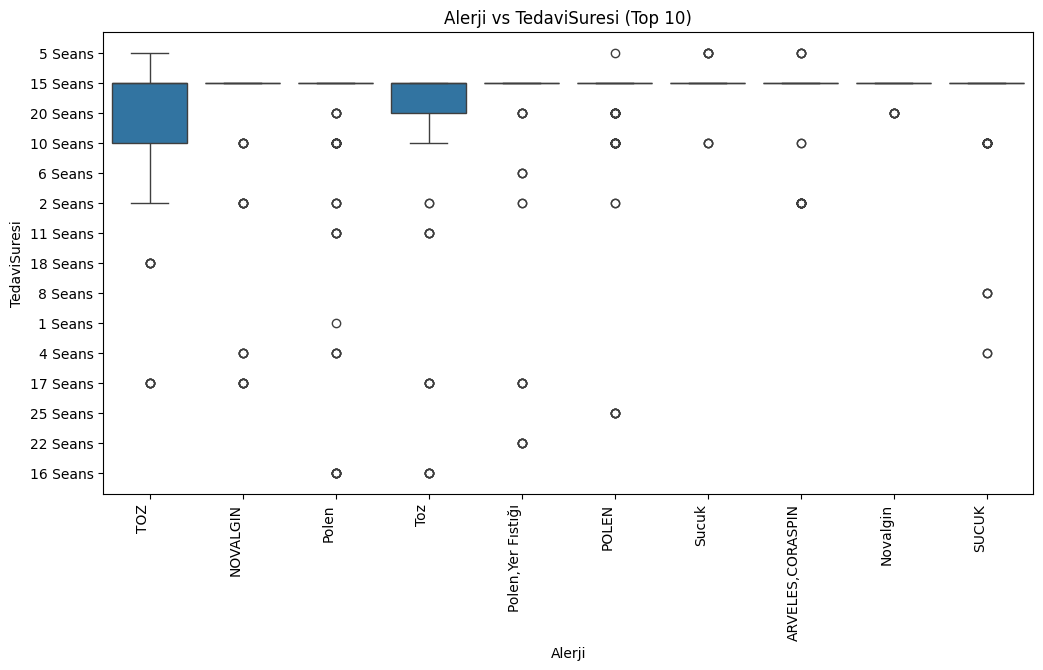

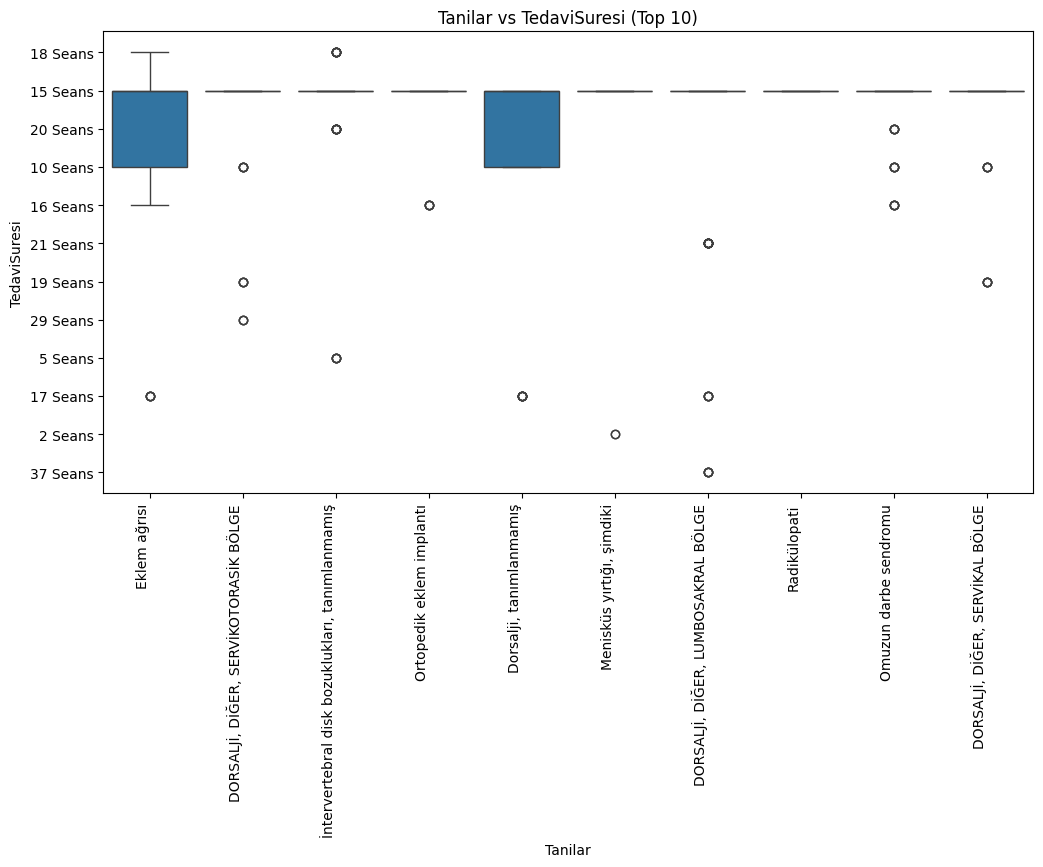

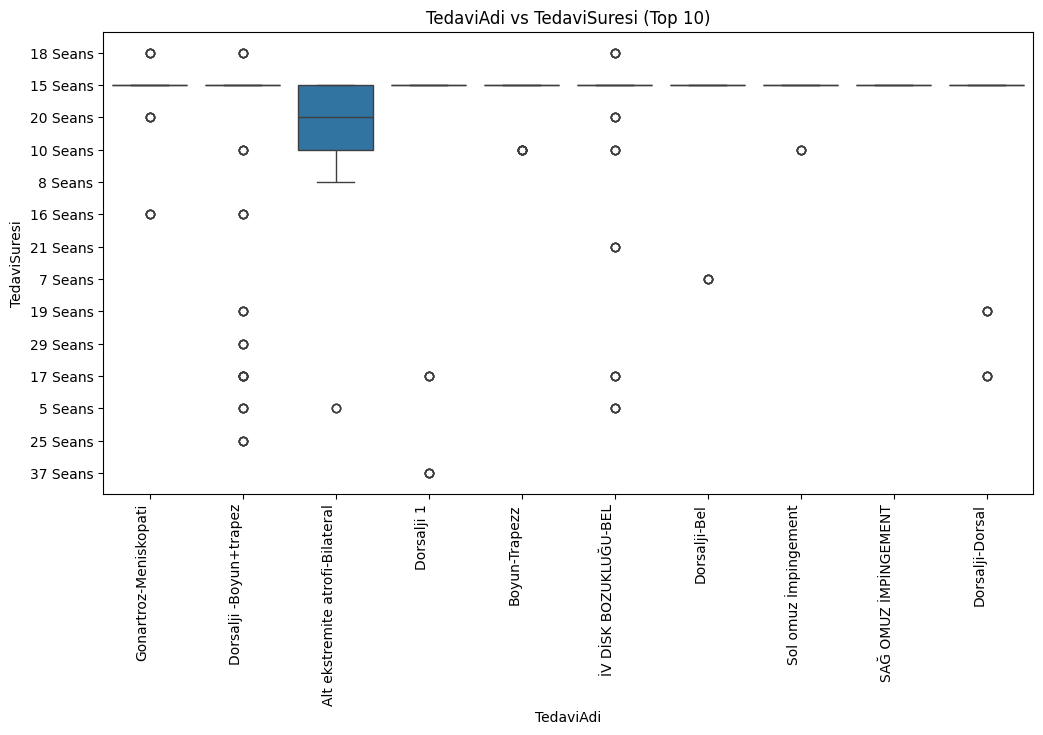

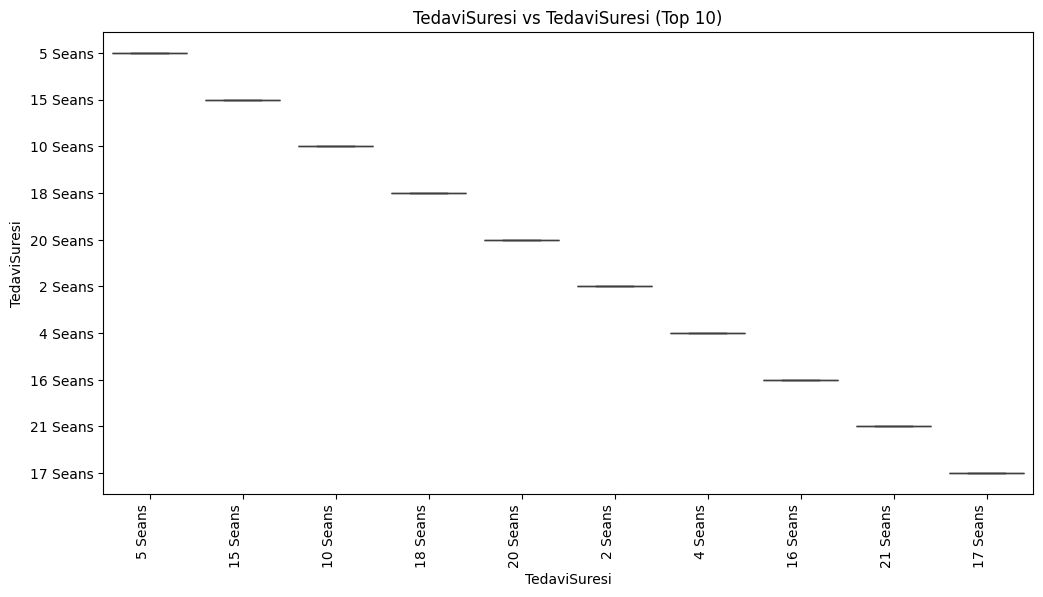

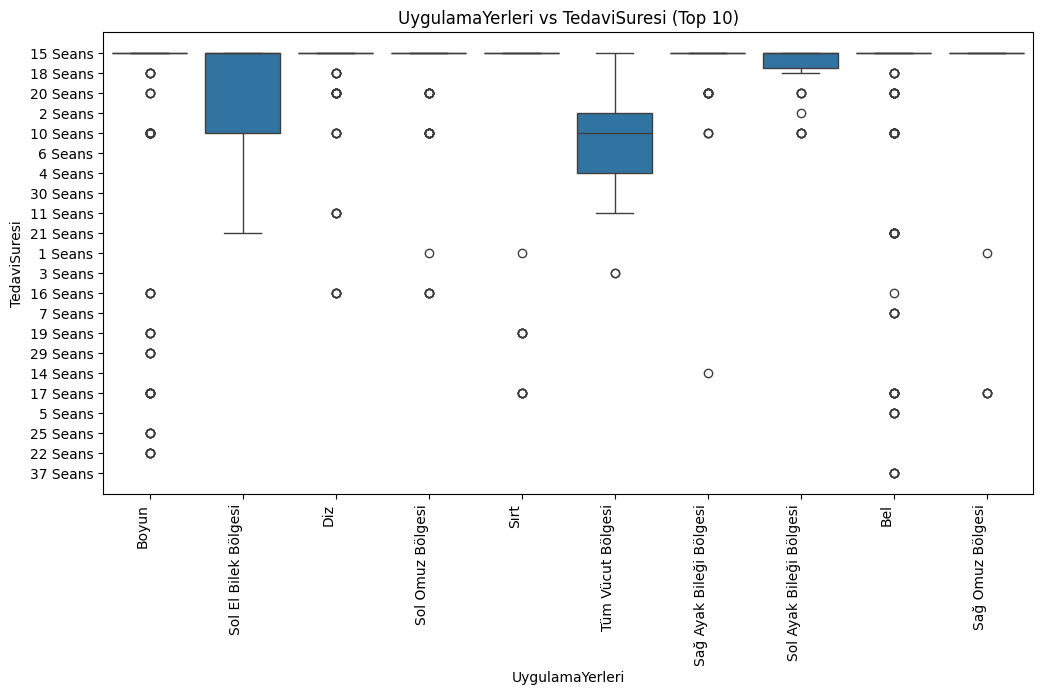

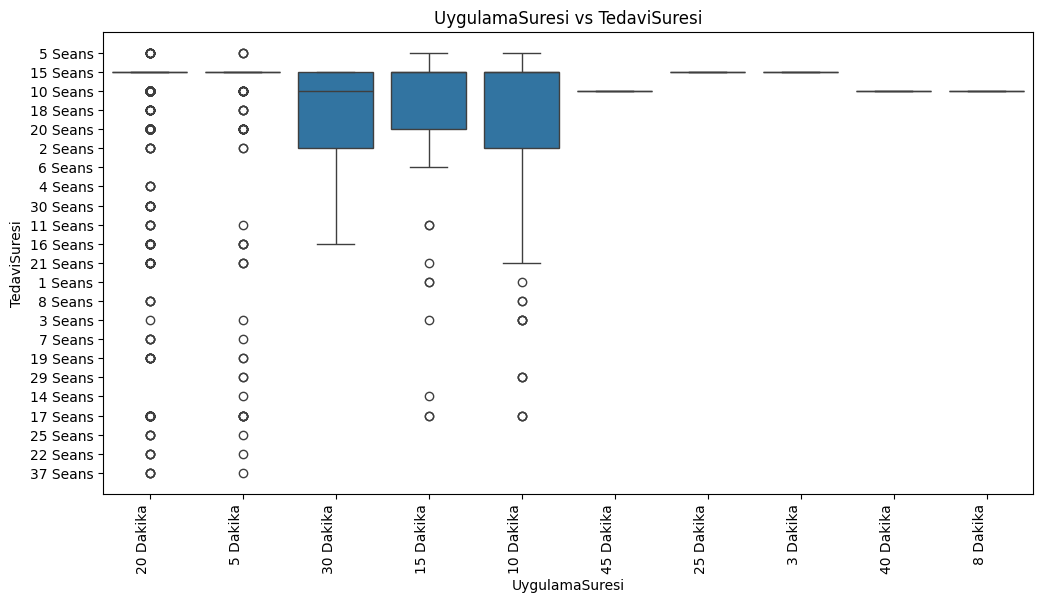


===== 5Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenler Korelasyon Matrisi =====


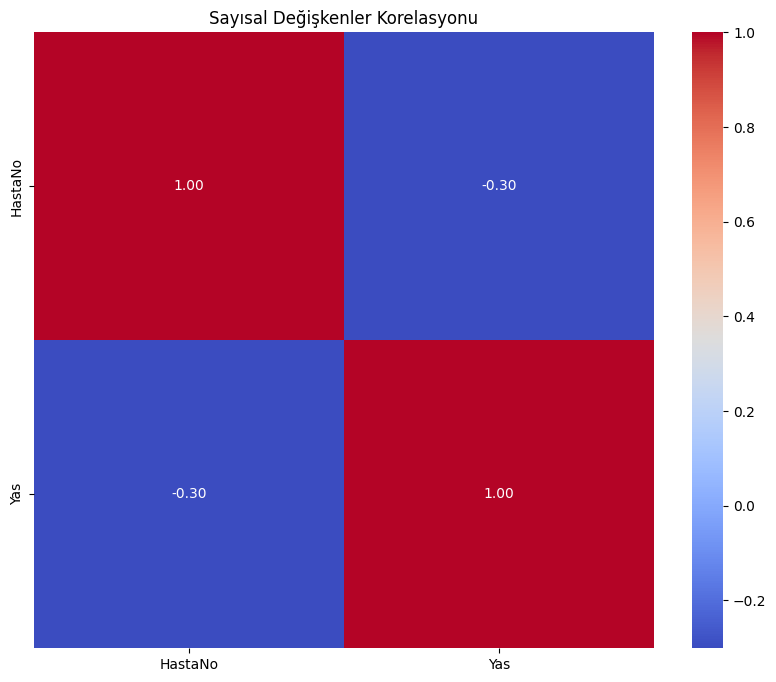

In [2]:
# =====================================
# A≈ûAMA 2: G√ñRSEL ANALƒ∞Z
# =====================================

import seaborn as sns
import matplotlib.pyplot as plt

print("="*50)
print("2Ô∏è‚É£ A≈ûAMA 2 ‚Äì G√ñRSEL ANALƒ∞Z (OKUNAKLI GRAFƒ∞KLER)")
print("="*50)

# -------------------------------
# 1Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenlerin Daƒüƒ±lƒ±mlarƒ± (Histogram)
# -------------------------------
print("\n===== 1Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenlerin Daƒüƒ±lƒ±mlarƒ± =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    df[col].hist(bins=30)
    plt.title(f"{col} Daƒüƒ±lƒ±mƒ±")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

# -------------------------------
# 2Ô∏è‚É£ Aykƒ±rƒ± Deƒüerler (Boxplot)
# -------------------------------
print("\n===== 2Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenlerde Boxplot =====")
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

# -------------------------------
# 3Ô∏è‚É£ Kategorik Deƒüi≈üken Daƒüƒ±lƒ±mlarƒ± (Barplot)
# -------------------------------
print("\n===== 3Ô∏è‚É£ Kategorik Deƒüi≈üken Daƒüƒ±lƒ±mlarƒ± =====")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12,6))

    # Eƒüer kategori sayƒ±sƒ± √ßoksa, sadece top 10 g√∂ster
    if df[col].nunique() > 15:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.countplot(x=col, data=df[df[col].isin(top_categories)])
        plt.title(f"{col} Daƒüƒ±lƒ±mƒ± (Top 10)")
    else:
        sns.countplot(x=col, data=df)
        plt.title(f"{col} Daƒüƒ±lƒ±mƒ±")

    plt.xticks(rotation=90, ha='right')
    plt.show()

# -------------------------------
# 4Ô∏è‚É£ Hedef Deƒüi≈üken ile Kategorik ƒ∞li≈ükiler (Boxplot)
# -------------------------------
print("\n===== 4Ô∏è‚É£ Hedef Deƒüi≈üken (TedaviSuresi) ile Kategorik Deƒüi≈ükenler =====")
for col in categorical_cols:
    plt.figure(figsize=(12,6))

    # Eƒüer kategori sayƒ±sƒ± √ßoksa top 10
    if df[col].nunique() > 15:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.boxplot(x=col, y="TedaviSuresi", data=df[df[col].isin(top_categories)])
        plt.title(f"{col} vs TedaviSuresi (Top 10)")
    else:
        sns.boxplot(x=col, y="TedaviSuresi", data=df)
        plt.title(f"{col} vs TedaviSuresi")

    plt.xticks(rotation=90, ha='right')
    plt.show()

# -------------------------------
# 5Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenler Korelasyon Matrisi (Heatmap)
# -------------------------------
print("\n===== 5Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenler Korelasyon Matrisi =====")
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayƒ±sal Deƒüi≈ükenler Korelasyonu")
plt.show()




# Preprocessing

In [3]:
# =====================================
# A≈ûAMA 3: VERƒ∞ √ñN ƒ∞≈ûLEME
# =====================================

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

def preprocess(df):
    """
    T√ºm veri √∂n i≈üleme adƒ±mlarƒ±nƒ± (sayƒ±sala √ßevirme, eksik doldurma,
    metin feature engineering, encoding, aykƒ±rƒ± deƒüer d√ºzeltme, scaling, NLP)
    adƒ±m adƒ±m print ile g√∂sterir.
    """
    print("="*50)
    print("3Ô∏è‚É£ A≈ûAMA 3 ‚Äì VERƒ∞ √ñN ƒ∞≈ûLEME (EXPLANATORY)")
    print("="*50)

    # -------------------------------
    # 1Ô∏è‚É£ TedaviSuresi ve UygulamaSuresi sayƒ±sala √ßevir
    print("\n===== 1Ô∏è‚É£ TedaviSuresi ve UygulamaSuresi sayƒ±sala √ßeviriliyor =====")
    df['TedaviSuresi'] = df['TedaviSuresi'].astype(str).str.extract(r'(\d+)').astype(float)
    df['UygulamaSuresi'] = df['UygulamaSuresi'].astype(str).str.extract(r'(\d+)').astype(float)
    print("√ñrnek d√∂n√º≈üt√ºrme:\n", df[['TedaviSuresi','UygulamaSuresi']].head())

    # -------------------------------
    # 2Ô∏è‚É£ Eksik deƒüerleri doldur
    print("\n===== 2Ô∏è‚É£ Eksik Deƒüerleri Doldurma =====")
    cat_imputer_freq = ['Cinsiyet','Bolum','Uyruk','KanGrubu']
    cat_imputer_empty = ['Alerji','KronikHastalik','Tanilar']

    freq_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_imputer_freq] = freq_imputer.fit_transform(df[cat_imputer_freq])

    for col in cat_imputer_empty:
        df[col] = df[col].fillna('Yok')

    print("Eksik deƒüerler dolduruldu. √ñrnek:\n", df[cat_imputer_freq + cat_imputer_empty].head())

    # -------------------------------
    # 3Ô∏è‚É£ Metin Deƒüi≈ükenlerden Feature M√ºhendisliƒüi
    print("\n===== 3Ô∏è‚É£ Metin deƒüi≈ükenlerden yeni sayƒ±sal √∂zellikler =====")
    df['KronikHastalik_sayisi'] = df['KronikHastalik'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    df['Alerji_sayisi'] = df['Alerji'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    df['Tanilar_sayisi'] = df['Tanilar'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    print("√ñrnek yeni √∂zellikler:\n", df[['KronikHastalik_sayisi','Alerji_sayisi','Tanilar_sayisi']].head())

    # ‚úÖ EKLENDƒ∞: NLP tabanlƒ± kelime sƒ±klƒ±ƒüƒ± (CountVectorizer)
    print("\n===== üÜï NLP Feature Engineering: Tanƒ±lar ve KronikHastalƒ±k Kelime Sƒ±klƒ±ƒüƒ± =====")

    # Tanƒ±lar i√ßin en sƒ±k 10 kelime
    vectorizer_tanilar = CountVectorizer(max_features=10)
    X_tanilar = vectorizer_tanilar.fit_transform(df['Tanilar'].astype(str)).toarray()
    tanilar_df = pd.DataFrame(X_tanilar, columns=[f"tanilar_{w}" for w in vectorizer_tanilar.get_feature_names_out()])

    # Kronik hastalƒ±k i√ßin en sƒ±k 10 kelime
    vectorizer_kronik = CountVectorizer(max_features=10)
    X_kronik = vectorizer_kronik.fit_transform(df['KronikHastalik'].astype(str)).toarray()
    kronik_df = pd.DataFrame(X_kronik, columns=[f"kronik_{w}" for w in vectorizer_kronik.get_feature_names_out()])

    # Orijinal dataframe ile birle≈ütir
    df = pd.concat([df.reset_index(drop=True), tanilar_df, kronik_df], axis=1)

    print("En sƒ±k ge√ßen Tanƒ±lar kelimeleri:", vectorizer_tanilar.get_feature_names_out())
    print("En sƒ±k ge√ßen KronikHastalƒ±k kelimeleri:", vectorizer_kronik.get_feature_names_out())
    print("Yeni NLP √∂zelliklerinden √∂rnek:\n", df[[*tanilar_df.columns, *kronik_df.columns]].head())

    # -------------------------------
    # 4Ô∏è‚É£ Kategorik Deƒüi≈ükenleri OneHotEncode et
    print("\n===== 4Ô∏è‚É£ Kategorik Deƒüi≈ükenler OneHotEncoder ile encode ediliyor =====")
    ohe_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum',
                'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

    ohe = OneHotEncoder(sparse_output=False, drop=None)
    df_ohe = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
    df = df.drop(columns=ohe_cols)
    df = pd.concat([df, df_ohe], axis=1)
    print("√ñrnek encode edilmi≈ü s√ºtunlar:\n", df_ohe.head())

    # -------------------------------
    # 5Ô∏è‚É£ Aykƒ±rƒ± Deƒüer Analizi ve D√ºzeltme (IQR Y√∂ntemi)
    print("\n===== 5Ô∏è‚É£ Aykƒ±rƒ± Deƒüer Analizi ve D√ºzeltme (IQR) =====")
    outlier_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi']

    def iqr_bounds(series, k=1.5):
        Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
        IQR = Q3 - Q1
        return Q1 - k*IQR, Q3 + k*IQR

    for col in outlier_cols:
        lower, upper = iqr_bounds(df[col])
        n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"{col}: {n_outliers} aykƒ±rƒ± deƒüer bulundu (alt={lower:.2f}, √ºst={upper:.2f})")
        df[col] = df[col].clip(lower, upper)
    print("\n‚úÖ Aykƒ±rƒ± deƒüerler Winsorize (clip) y√∂ntemiyle sƒ±nƒ±rlar i√ßine √ßekildi.")

    # -------------------------------
    # 6Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenleri StandardScaler ile standartla≈ütƒ±r
    print("\n===== 6Ô∏è‚É£ Sayƒ±sal Deƒüi≈ükenler StandardScaler ile √∂l√ßekleniyor =====")
    scaler_cols = ['Yas','TedaviSuresi','UygulamaSuresi',
                   'KronikHastalik_sayisi','Alerji_sayisi','Tanilar_sayisi']
    scaler = StandardScaler()
    df[scaler_cols] = scaler.fit_transform(df[scaler_cols])
    print("√ñl√ßeklenmi≈ü sayƒ±sal √∂rnek:\n", df[scaler_cols].head())

    # -------------------------------
    # 7Ô∏è‚É£ Son Kontrol
    print("\n===== 7Ô∏è‚É£ Veri √ñn ƒ∞≈üleme Sonrasƒ± √ñzet =====")
    print(df.head())
    print("\nVeri boyutu:", df.shape)
    print("Eksik deƒüer kontrol√º:\n", df.isnull().sum())

    return df


# T√ºm √∂n i≈üleme adƒ±mlarƒ±nƒ± √ßalƒ±≈ütƒ±r
df = preprocess(df)


3Ô∏è‚É£ A≈ûAMA 3 ‚Äì VERƒ∞ √ñN ƒ∞≈ûLEME (EXPLANATORY)

===== 1Ô∏è‚É£ TedaviSuresi ve UygulamaSuresi sayƒ±sala √ßeviriliyor =====
√ñrnek d√∂n√º≈üt√ºrme:
    TedaviSuresi  UygulamaSuresi
0           5.0            20.0
1          15.0            20.0
2          15.0            20.0
3          15.0             5.0
4          15.0            20.0

===== 2Ô∏è‚É£ Eksik Deƒüerleri Doldurma =====
Eksik deƒüerler dolduruldu. √ñrnek:
   Cinsiyet                                           Bolum    Uyruk KanGrubu  \
0    Kadƒ±n  Fiziksel Tƒ±p Ve Rehabilitasyon,Solunum Merkezi  T√ºrkiye    0 Rh+   
1    Erkek  Fiziksel Tƒ±p Ve Rehabilitasyon,Solunum Merkezi  T√ºrkiye    0 Rh+   
2    Erkek  Fiziksel Tƒ±p Ve Rehabilitasyon,Solunum Merkezi  T√ºrkiye    0 Rh+   
3    Erkek  Fiziksel Tƒ±p Ve Rehabilitasyon,Solunum Merkezi  T√ºrkiye    0 Rh+   
4    Erkek  Fiziksel Tƒ±p Ve Rehabilitasyon,Solunum Merkezi  T√ºrkiye    0 Rh+   

  Alerji                                     KronikHastalik  \
0    TOZ  Becker

# √ñn ƒ∞≈üleme Sonrasƒ± Veri G√∂rselle≈ütirme (EDA)

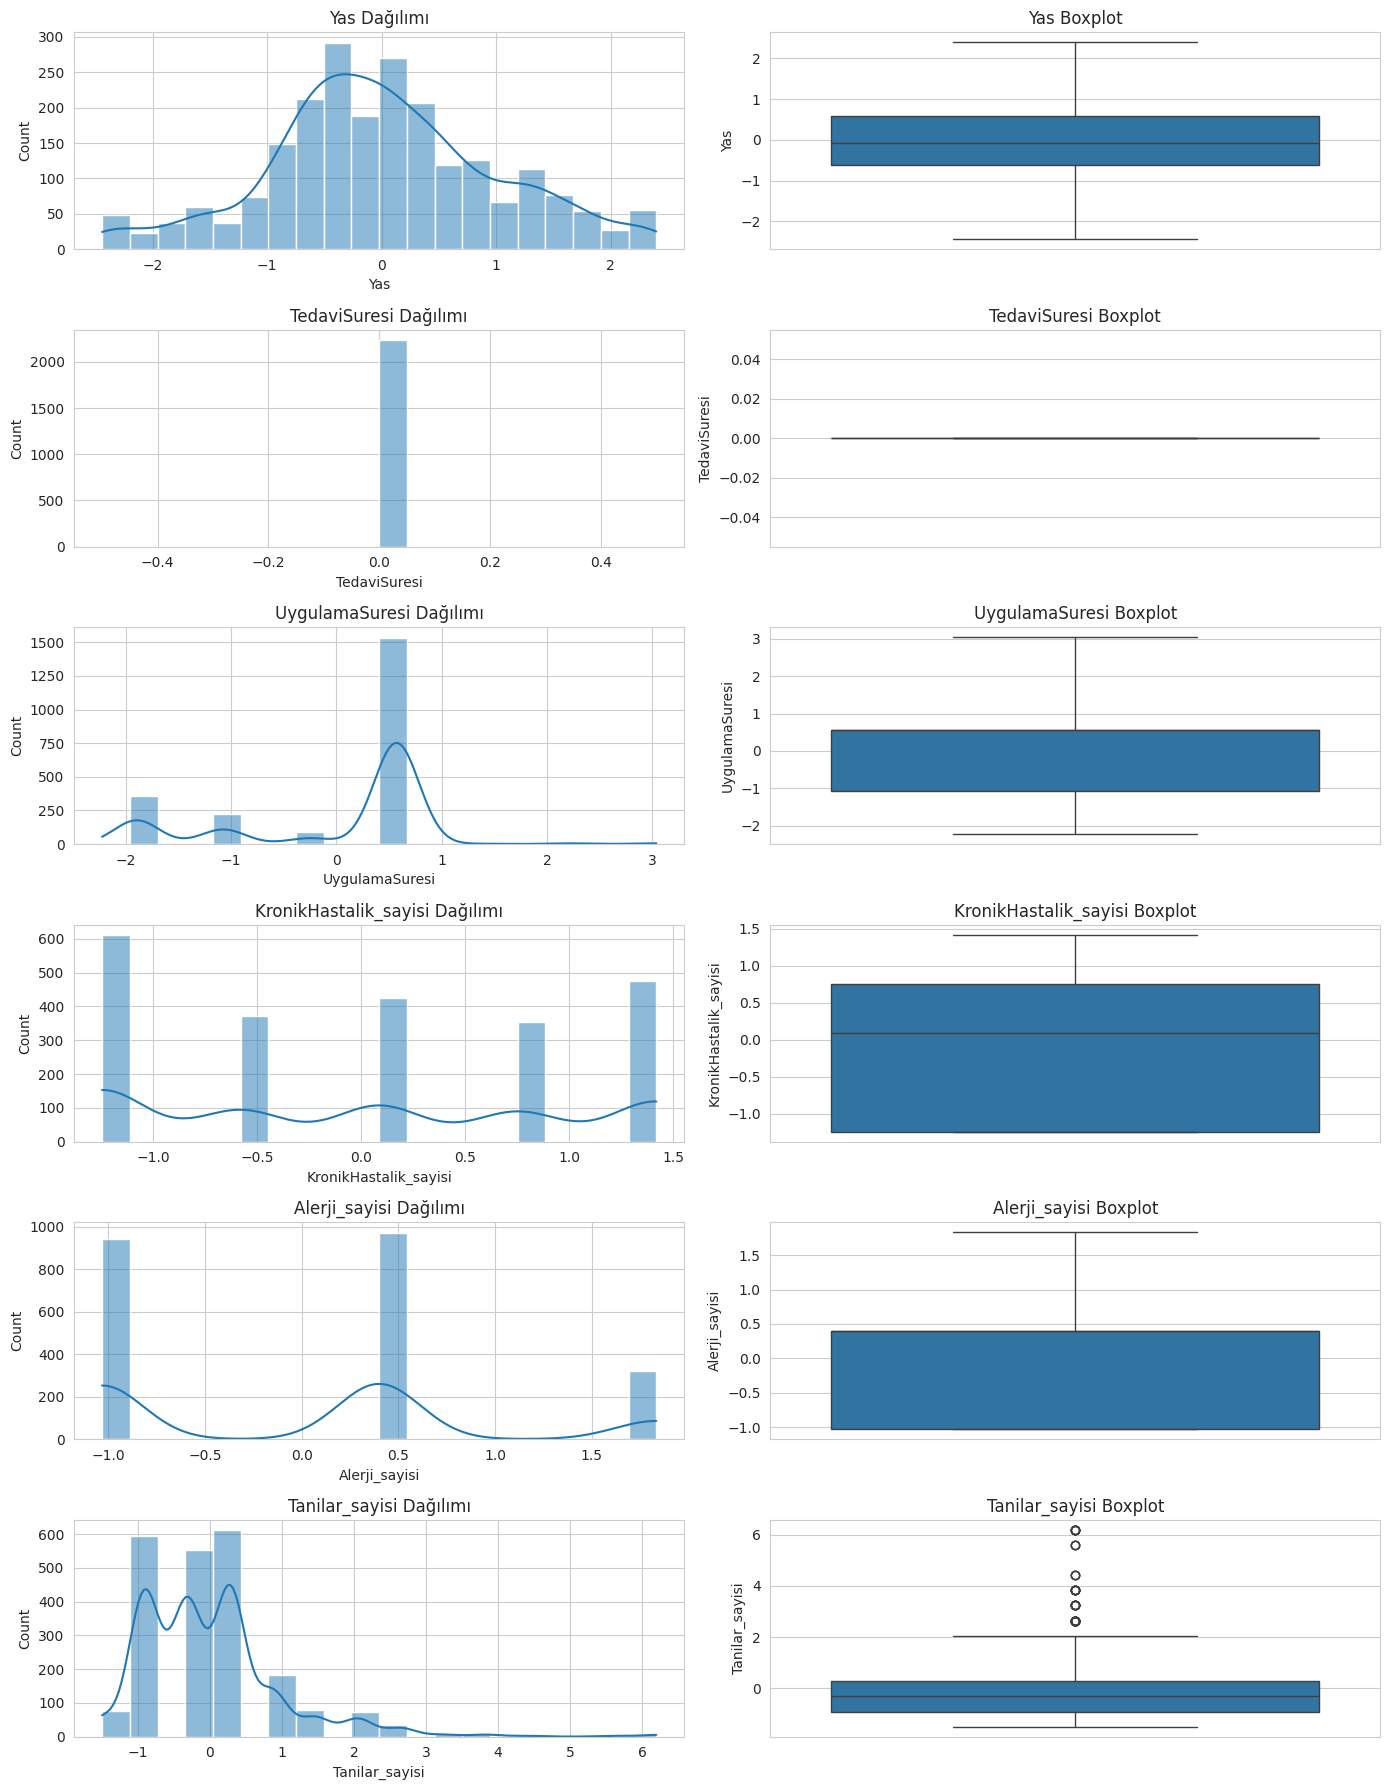


‚úÖ Histogram ve boxplotlar: Sayƒ±sal deƒüi≈ükenlerin daƒüƒ±lƒ±mƒ±nƒ± ve olasƒ± aykƒ±rƒ± deƒüerleri g√∂sterir.



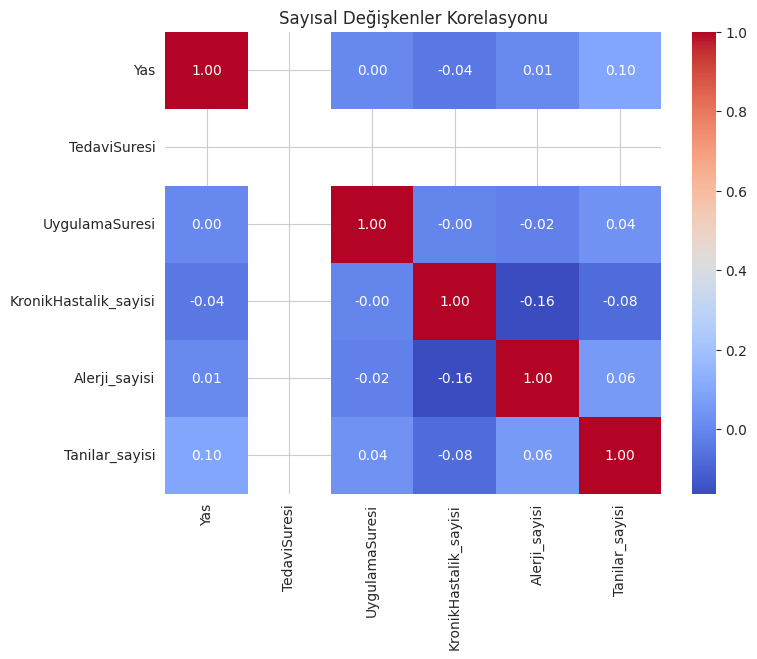


‚úÖ Korelasyon heatmap: Hangi sayƒ±sal deƒüi≈ükenler TedaviSuresi ile daha ili≈ükili, kolayca g√∂r√ºlebilir.



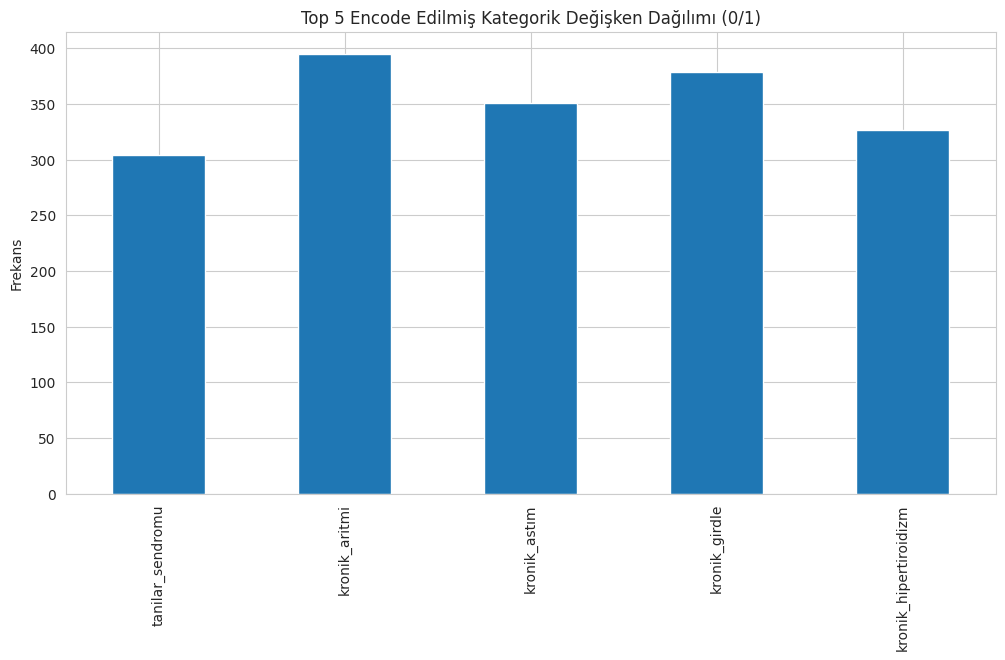


‚úÖ Encode edilmi≈ü kategorik deƒüi≈ükenler: Hangi kategorinin daha sƒ±k olduƒüunu g√∂sterir.



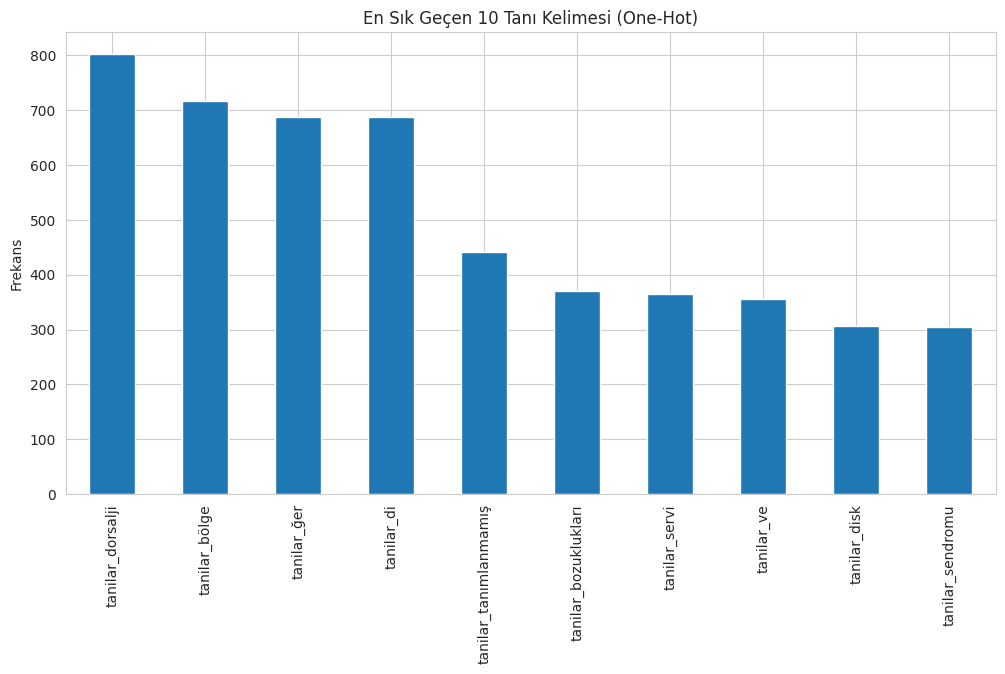

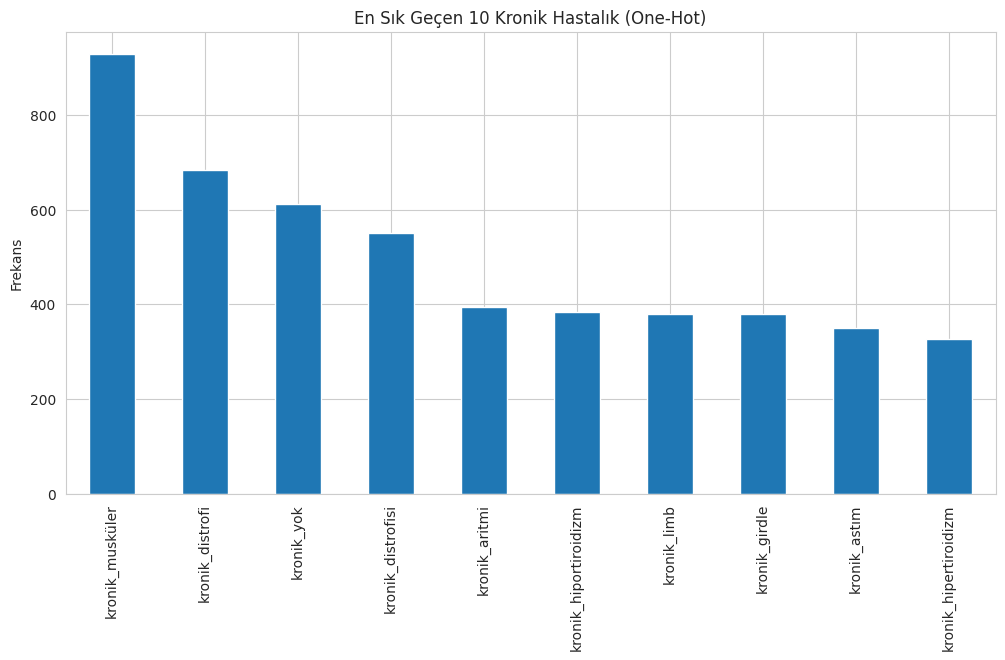


‚úÖ NLP √∂zetleri: En sƒ±k ge√ßen tanƒ±lar ve kronik hastalƒ±klar g√∂rselle≈ütirildi.



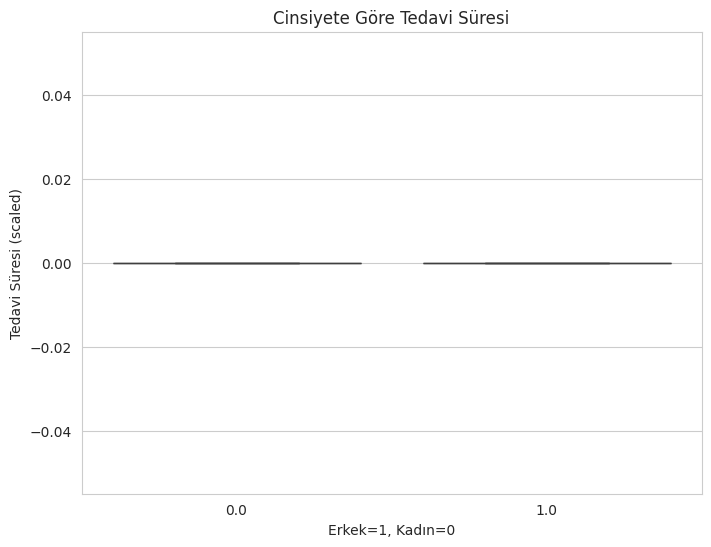

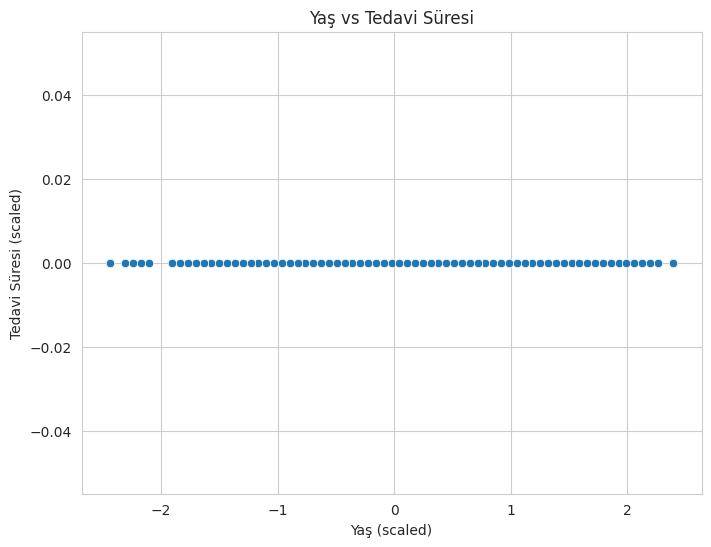


‚úÖ Tedavi S√ºresi ile ili≈ükili analizler: Cinsiyet ve ya≈üa g√∂re farklar g√∂zlendi.



In [4]:
# =====================================
# √ñn ƒ∞≈üleme Sonrasƒ± Geni≈ületilmi≈ü EDA
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -----------------------------
# 1Ô∏è‚É£ Sayƒ±sal deƒüi≈ükenlerin histogram + boxplot
numeric_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi',
                'KronikHastalik_sayisi', 'Alerji_sayisi', 'Tanilar_sayisi']

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i,0])
    axes[i,0].set_title(f"{col} Daƒüƒ±lƒ±mƒ±")
    axes[i,0].set_xlabel(col)

    sns.boxplot(y=df[col], ax=axes[i,1])
    axes[i,1].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

print("\n‚úÖ Histogram ve boxplotlar: Sayƒ±sal deƒüi≈ükenlerin daƒüƒ±lƒ±mƒ±nƒ± ve olasƒ± aykƒ±rƒ± deƒüerleri g√∂sterir.\n")

# -----------------------------
# 2Ô∏è‚É£ Korelasyon heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayƒ±sal Deƒüi≈ükenler Korelasyonu")
plt.show()
print("\n‚úÖ Korelasyon heatmap: Hangi sayƒ±sal deƒüi≈ükenler TedaviSuresi ile daha ili≈ükili, kolayca g√∂r√ºlebilir.\n")

# -----------------------------
# 3Ô∏è‚É£ Encode edilmi≈ü kategorik deƒüi≈ükenlerin √∂zet barplot (top 5)
encoded_categorical_cols = [col for col in df.columns if '_' in col and df[col].nunique() == 2]
top_cols = encoded_categorical_cols[:5]  # ƒ∞lk 5 s√ºtunu g√∂ster

df[top_cols].sum().plot(kind='bar')
plt.title("Top 5 Encode Edilmi≈ü Kategorik Deƒüi≈üken Daƒüƒ±lƒ±mƒ± (0/1)")
plt.ylabel("Frekans")
plt.show()
print("\n‚úÖ Encode edilmi≈ü kategorik deƒüi≈ükenler: Hangi kategorinin daha sƒ±k olduƒüunu g√∂sterir.\n")

# -----------------------------
# 4Ô∏è‚É£ NLP Feature Engineering √∂zetleri (en sƒ±k kelimeler)
nlp_cols_tanilar = [col for col in df.columns if col.startswith("tanilar_")]
nlp_cols_kronik = [col for col in df.columns if col.startswith("kronik_")]

# En sƒ±k ge√ßen 10 tanƒ± kelimesi
df[nlp_cols_tanilar].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("En Sƒ±k Ge√ßen 10 Tanƒ± Kelimesi (One-Hot)")
plt.ylabel("Frekans")
plt.show()

# En sƒ±k ge√ßen 10 kronik hastalƒ±k
df[nlp_cols_kronik].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("En Sƒ±k Ge√ßen 10 Kronik Hastalƒ±k (One-Hot)")
plt.ylabel("Frekans")
plt.show()

print("\n‚úÖ NLP √∂zetleri: En sƒ±k ge√ßen tanƒ±lar ve kronik hastalƒ±klar g√∂rselle≈ütirildi.\n")

# -----------------------------
# 5Ô∏è‚É£ Tedavi S√ºresi ile ili≈ükili g√∂rselle≈ütirmeler
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Cinsiyet_Erkek'], y=df['TedaviSuresi'])
plt.title("Cinsiyete G√∂re Tedavi S√ºresi")
plt.xlabel("Erkek=1, Kadƒ±n=0")
plt.ylabel("Tedavi S√ºresi (scaled)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Yas'], y=df['TedaviSuresi'])
plt.title("Ya≈ü vs Tedavi S√ºresi")
plt.xlabel("Ya≈ü (scaled)")
plt.ylabel("Tedavi S√ºresi (scaled)")
plt.show()

print("\n‚úÖ Tedavi S√ºresi ile ili≈ükili analizler: Cinsiyet ve ya≈üa g√∂re farklar g√∂zlendi.\n")
